# Reservation Cancellation Prediction

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load data

In [2]:
df=pd.read_csv("train__dataset.csv")

In [3]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,4,0,0,0,118,2017,12,28,1,0,0,0,110.80,2,0
1,2,1,0,2,0,0,0,17,2018,4,14,1,0,0,0,145.00,0,1
2,1,0,1,5,0,0,0,349,2018,10,4,0,0,0,0,96.67,0,1
3,1,0,2,4,0,0,0,69,2018,6,12,0,0,0,0,120.00,0,1
4,2,0,0,4,1,0,0,11,2018,1,20,1,0,0,0,69.50,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18132,1,0,0,2,0,0,0,103,2018,4,19,0,0,0,0,115.00,0,1
18133,2,0,0,3,0,0,0,129,2018,8,10,1,0,0,0,88.01,1,0
18134,2,0,0,1,0,0,0,90,2018,7,13,1,0,0,0,105.30,0,1
18135,2,0,0,3,0,0,0,18,2018,11,10,1,1,0,1,123.33,1,0


In [4]:
df.shape

(18137, 18)

In [5]:
df=df.drop_duplicates()

In [6]:
df.shape

(14026, 18)

In [7]:
Ncanceled =df['booking_status'].sum()
total=df.shape[0]
Ncanceled/total

0.29210038499928703

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14026 entries, 0 to 18136
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          14026 non-null  int64  
 1   no_of_children                        14026 non-null  int64  
 2   no_of_weekend_nights                  14026 non-null  int64  
 3   no_of_week_nights                     14026 non-null  int64  
 4   type_of_meal_plan                     14026 non-null  int64  
 5   required_car_parking_space            14026 non-null  int64  
 6   room_type_reserved                    14026 non-null  int64  
 7   lead_time                             14026 non-null  int64  
 8   arrival_year                          14026 non-null  int64  
 9   arrival_month                         14026 non-null  int64  
 10  arrival_date                          14026 non-null  int64  
 11  market_segment_

 don't have null values

In [9]:
df.isna().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [10]:
df['type_of_meal_plan'].unique() #need one hot code

array([0, 1, 2, 3], dtype=int64)

In [11]:
one_hot = pd.get_dummies(df['type_of_meal_plan'], prefix='type_of_meal_plan')

# Add the one-hot encoded variables to the original dataframe
df = pd.concat([df, one_hot], axis=1)
df=df.drop(columns=['type_of_meal_plan'])
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,...,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,type_of_meal_plan_0,type_of_meal_plan_1,type_of_meal_plan_2,type_of_meal_plan_3
0,2,0,1,4,0,0,118,2017,12,28,...,0,0,0,110.80,2,0,1,0,0,0
1,2,1,0,2,0,0,17,2018,4,14,...,0,0,0,145.00,0,1,1,0,0,0
2,1,0,1,5,0,0,349,2018,10,4,...,0,0,0,96.67,0,1,1,0,0,0
3,1,0,2,4,0,0,69,2018,6,12,...,0,0,0,120.00,0,1,1,0,0,0
4,2,0,0,4,0,0,11,2018,1,20,...,0,0,0,69.50,1,0,0,1,0,0


In [12]:
df['room_type_reserved'].unique() #need one hot code

array([0, 1, 4, 3, 2, 5, 6], dtype=int64)

In [13]:
one_hot = pd.get_dummies(df['room_type_reserved'], prefix='room_type_reserved')

# Add the one-hot encoded variables to the original dataframe
df = pd.concat([df, one_hot], axis=1)
df=df.drop(columns=['room_type_reserved'])
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,...,type_of_meal_plan_1,type_of_meal_plan_2,type_of_meal_plan_3,room_type_reserved_0,room_type_reserved_1,room_type_reserved_2,room_type_reserved_3,room_type_reserved_4,room_type_reserved_5,room_type_reserved_6
0,2,0,1,4,0,118,2017,12,28,1,...,0,0,0,1,0,0,0,0,0,0
1,2,1,0,2,0,17,2018,4,14,1,...,0,0,0,1,0,0,0,0,0,0
2,1,0,1,5,0,349,2018,10,4,0,...,0,0,0,1,0,0,0,0,0,0
3,1,0,2,4,0,69,2018,6,12,0,...,0,0,0,1,0,0,0,0,0,0
4,2,0,0,4,0,11,2018,1,20,1,...,1,0,0,1,0,0,0,0,0,0


In [14]:
df['market_segment_type'].unique() #need one hot code

array([1, 0, 2, 4, 3], dtype=int64)

In [15]:
one_hot = pd.get_dummies(df['market_segment_type'], prefix='market_segment_type')

# Add the one-hot encoded variables to the original dataframe
df = pd.concat([df, one_hot], axis=1)
df=df.drop(columns=['market_segment_type'])
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_2,room_type_reserved_3,room_type_reserved_4,room_type_reserved_5,room_type_reserved_6,market_segment_type_0,market_segment_type_1,market_segment_type_2,market_segment_type_3,market_segment_type_4
0,2,0,1,4,0,118,2017,12,28,0,...,0,0,0,0,0,0,1,0,0,0
1,2,1,0,2,0,17,2018,4,14,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,1,5,0,349,2018,10,4,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,2,4,0,69,2018,6,12,0,...,0,0,0,0,0,1,0,0,0,0
4,2,0,0,4,0,11,2018,1,20,0,...,0,0,0,0,0,0,1,0,0,0


If the 'arrival_year', 'arrival_month', and 'arrival_date' columns are currently of integer type, it may be beneficial to change their data type to category type. This will prevent these columns from affecting the accuracy of the model and will allow for easier manipulation and analysis of the data.

In [16]:
df['arrival_year'] = df['arrival_year'].astype('category')
df['arrival_month'] = df['arrival_month'].astype('category')
df['arrival_date'] = df['arrival_date'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14026 entries, 0 to 18136
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          14026 non-null  int64   
 1   no_of_children                        14026 non-null  int64   
 2   no_of_weekend_nights                  14026 non-null  int64   
 3   no_of_week_nights                     14026 non-null  int64   
 4   required_car_parking_space            14026 non-null  int64   
 5   lead_time                             14026 non-null  int64   
 6   arrival_year                          14026 non-null  category
 7   arrival_month                         14026 non-null  category
 8   arrival_date                          14026 non-null  category
 9   repeated_guest                        14026 non-null  int64   
 10  no_of_previous_cancellations          14026 non-null  int64   
 11  no

Is there outliers

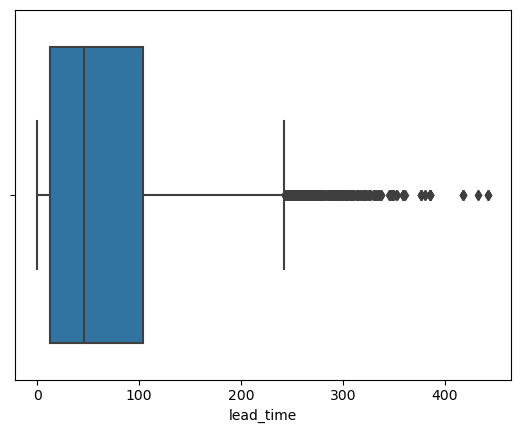

In [17]:
sns.boxplot(x=df["lead_time"])
plt.show()

In [18]:
Q1 = df['lead_time'].quantile(0.25)
Q3 = df['lead_time'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# Count the number of outliers
num_outliers = ((df['lead_time'] < lower_bound) | (df['lead_time'] > upper_bound)).sum()

# Print the result
print(f"Number of outliers in 'column': {num_outliers}")

Number of outliers in 'column': 460


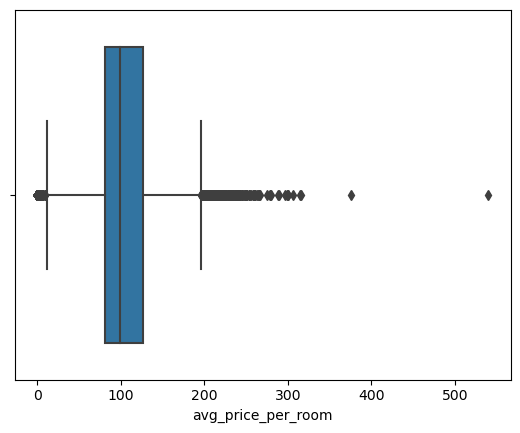

In [19]:
sns.boxplot(x=df["avg_price_per_room"])
plt.show()

In [20]:
Q1 = df['avg_price_per_room'].quantile(0.25)
Q3 = df['avg_price_per_room'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# Count the number of outliers
num_outliers = ((df['avg_price_per_room'] < lower_bound) | (df['avg_price_per_room'] > upper_bound)).sum()

# Print the result
print(f"Number of outliers in 'column': {num_outliers}")

Number of outliers in 'column': 573


In [21]:
#####
#     to test without outliers

We can identify outliers in our data by observing the boxplot. However, if there are outliers present, it may not be necessary to remove them. In fact, removing outliers could potentially decrease the accuracy of the model.

In [22]:
df['has_children'] = df['no_of_children'].apply(lambda x: 0 if x == 0 else 1)
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_3,room_type_reserved_4,room_type_reserved_5,room_type_reserved_6,market_segment_type_0,market_segment_type_1,market_segment_type_2,market_segment_type_3,market_segment_type_4,has_children
0,2,0,1,4,0,118,2017,12,28,0,...,0,0,0,0,0,1,0,0,0,0
1,2,1,0,2,0,17,2018,4,14,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,1,5,0,349,2018,10,4,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,2,4,0,69,2018,6,12,0,...,0,0,0,0,1,0,0,0,0,0
4,2,0,0,4,0,11,2018,1,20,0,...,0,0,0,0,0,1,0,0,0,0


In [23]:
df['co1'] = df['arrival_month'].apply(lambda x: 1 if x <=3  else 0)
df['co2'] = df['arrival_month'].apply(lambda x: 1 if  (x >3 and x <=6)  else 0)
df['co3'] = df['arrival_month'].apply(lambda x: 1 if (x >6 and x <=9) else 0)
df['co4'] = df['arrival_month'].apply(lambda x: 1 if (x >9 and x <=12) else 0)
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,market_segment_type_0,market_segment_type_1,market_segment_type_2,market_segment_type_3,market_segment_type_4,has_children,co1,co2,co3,co4
0,2,0,1,4,0,118,2017,12,28,0,...,0,1,0,0,0,0,0,0,0,1
1,2,1,0,2,0,17,2018,4,14,0,...,0,1,0,0,0,1,0,1,0,0
2,1,0,1,5,0,349,2018,10,4,0,...,1,0,0,0,0,0,0,0,0,1
3,1,0,2,4,0,69,2018,6,12,0,...,1,0,0,0,0,0,0,1,0,0
4,2,0,0,4,0,11,2018,1,20,0,...,0,1,0,0,0,0,1,0,0,0


In [24]:
df.to_csv('editing.csv',index=False)

### Building models

In [25]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [26]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score
from sklearn.metrics import classification_report,confusion_matrix ,accuracy_score , plot_confusion_matrix ,plot_roc_curve

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from mlxtend.classifier import StackingClassifier


## Splitting and Scaling the data

In [28]:
X= df.drop(['booking_status'], axis=1)
y= df['booking_status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=3)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=.5, random_state=3)

In [29]:
y_test.shape

(7013,)

In [30]:
y_val.shape

(3507,)

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

###### Take 10,000 rows as a sample of data to use it in grid search

In [32]:
sub_main=df.sample(10000)
X1= sub_main.drop('booking_status', axis=1)
subset_y_train= sub_main['booking_status']
scaler = StandardScaler()
X_train_scaled1 = scaler.fit_transform(X1)

In [33]:
X1.shape

(10000, 35)

In [34]:
subset_y_train.shape

(10000,)

###### Experminting with different models:

### 1- KNN

In [35]:
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [36]:
knn =KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled1, subset_y_train)

print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

C:\Users\THAMIR\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\THAMIR\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\THAMIR\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\THAMIR\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\THAMIR\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\THAMIR\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\THAMIR\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\THAMIR\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\THAMIR\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\THAMIR\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\THAMIR\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\THAMIR\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\THAMIR\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\THAMIR\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\THAMIR\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\THAMIR\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\THAMIR\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\THAMIR\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

C:\Users\THAMIR\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\THAMIR\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

Best params:  {'n_neighbors': 27, 'weights': 'distance'}
Best estimator:  KNeighborsClassifier(n_neighbors=27, weights='distance')
Best score:  0.7961


In [37]:
knn = KNeighborsClassifier(n_neighbors=16, weights='distance')
knn.fit(X_train_scaled, y_train)
print("The score for kNN is")
print("Training set: {:6.2f}%".format(100*knn.score(X_train_scaled, y_train)))
print("validation set: {:6.2f}%".format(100*knn.score(X_val_scaled, y_val)))
print("kNN confusion matrix: \n\n", confusion_matrix(y_val, knn.predict(X_val_scaled)))

The score for kNN is
Training set:  99.83%
validation set:  78.36%
kNN confusion matrix: 

 [[2251  186]
 [ 573  497]]


### 2- Logistic Regression

In [38]:
dt_range = list(range(1, 100))
param_grid = dict(C=dt_range)
print(param_grid)

{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]}


In [39]:
log_reg = LogisticRegression()
grid = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled1, subset_y_train)

print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

C:\Users\THAMIR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\THAMIR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\THAMIR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\THAMIR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\THAMIR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\THAMIR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\THAMIR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\THAMIR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\THAMIR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\THAMIR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\THAMIR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\THAMIR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Best params:  {'C': 1}
Best estimator:  LogisticRegression(C=1)
Best score:  0.8069000000000001


C:\Users\THAMIR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
log_reg = LogisticRegression( C=1 )
log_reg.fit(X_train_scaled, y_train)
print("The score for logistic regression")
print("Training set is : {:6.2f}%".format(100*log_reg.score(X_train_scaled, y_train)))
print("validation set is: {:6.2f}%".format(100*log_reg.score(X_val_scaled, y_val)))
print("logistic regression confusion matrix: \n\n", confusion_matrix(y_val, log_reg.predict(X_val_scaled)))

The score for logistic regression
Training set is :  81.09%
validation set is:  80.81%
logistic regression confusion matrix: 

 [[2244  193]
 [ 480  590]]


### 3- Decision Tree

In [41]:
dt_range = list(range(1, 31))
param_grid = dict(max_depth=dt_range)
print(param_grid)

{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [42]:
decisiontree = DecisionTreeClassifier()
grid = GridSearchCV(decisiontree, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled1, subset_y_train)

print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Best params:  {'max_depth': 9}
Best estimator:  DecisionTreeClassifier(max_depth=9)
Best score:  0.841


In [43]:
decisiontree = DecisionTreeClassifier(max_depth=9)
decisiontree.fit(X_train_scaled, y_train)
print("The score for decision tree ")
print("Training set is : {:6.2f}%".format(100*decisiontree.score(X_train_scaled, y_train)))
print("validation set is: {:6.2f}%".format(100*decisiontree.score(X_val_scaled, y_val)))
print("decision tree confusion matrix: \n\n", confusion_matrix(y_val, decisiontree.predict(X_val_scaled)))

The score for decision tree 
Training set is :  89.42%
validation set is:  82.04%
decision tree confusion matrix: 

 [[2159  278]
 [ 352  718]]


### 4- Random Forest

In [44]:
rd_range = list(range(1, 200, 10))
param_grid = dict(n_estimators=rd_range)
print(param_grid)

{'n_estimators': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191]}


In [45]:
randomforest = RandomForestClassifier()
grid = GridSearchCV(randomforest, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train_scaled, y_train)

print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Best params:  {'n_estimators': 111}
Best estimator:  RandomForestClassifier(n_estimators=111)
Best score:  0.837423135853949


In [46]:
randomforest = RandomForestClassifier(n_estimators=191)
randomforest.fit(X_train_scaled, y_train)
print("The score for random forest ")
print("Training set is : {:6.2f}%".format(100*randomforest.score(X_train_scaled, y_train)))
print("validation set is: {:6.2f}%".format(100*randomforest.score(X_val_scaled, y_val)))
print("decision tree confusion matrix: \n\n", confusion_matrix(y_val, randomforest.predict(X_val_scaled)))

The score for random forest 
Training set is :  99.83%
validation set is:  84.26%
decision tree confusion matrix: 

 [[2279  158]
 [ 394  676]]


### Feature Engneering

###### RF (Polynomial degree 2)

In [47]:
from sklearn.preprocessing import  PolynomialFeatures

rf_poly2 = RandomForestClassifier(n_estimators=191)
poly2 = PolynomialFeatures(degree=2) 
X_train_poly = poly2.fit_transform(X_train)
X_val_poly = poly2.transform(X_val)
rf_poly2.fit(X_train_poly, y_train)

print("The score for random forest ploy 2 ")
print("Training set is : {:6.2f}%".format(100*rf_poly2.score(X_train_poly, y_train)))
print("validation set is: {:6.2f}%".format(100*rf_poly2.score(X_val_poly, y_val)))

The score for random forest ploy 2 
Training set is :  99.83%
validation set is:  84.69%


###### RF (Polynomial degree 3)

In [48]:
rf_poly3 = RandomForestClassifier(n_estimators=191)
poly3 = PolynomialFeatures(degree=3) 
X_train_poly = poly3.fit_transform(X_train)
X_val_poly = poly3.transform(X_val)
rf_poly3.fit(X_train_poly, y_train)

print("The score for random forest ploy 3 ")
print("Training set is : {:6.2f}%".format(100*rf_poly3.score(X_train_poly, y_train)))
print("validation set is: {:6.2f}%".format(100*rf_poly3.score(X_val_poly, y_val)))

The score for random forest ploy 3 
Training set is :  99.83%
validation set is:  84.55%


### 5- XGBClassifier

In [49]:
gbm = xgb.XGBClassifier( 
                        n_estimators=900,
                        max_depth=9,
                        objective='binary:logistic', #new objective
                        learning_rate=.05, 
                        subsample=.8,
                        min_child_weight=1,
                        colsample_bytree=.8
    
                       )

In [50]:
gbm.fit(X_train_scaled, y_train)
print("The score for XGB classifier")
print("Training set is : {:6.2f}%".format(100*gbm.score(X_train_scaled, y_train)))
print("validation set is: {:6.2f}%".format(100*gbm.score(X_val_scaled, y_val)))
print("decision tree confusion matrix: \n\n", confusion_matrix(y_val, gbm.predict(X_val_scaled)))

The score for XGB classifier
Training set is :  99.80%
validation set is:  83.69%
decision tree confusion matrix: 

 [[2234  203]
 [ 369  701]]


###### XGBClassifier (Polynominal with degree 2)

In [51]:
gbm_poly2 = xgb.XGBClassifier( 
                        n_estimators=900,
                        max_depth=9,
                        objective='binary:logistic', #new objective
                        learning_rate=.05, 
                        subsample=.8,
                        min_child_weight=1,
                        colsample_bytree=.8
                       )

poly22 = PolynomialFeatures(degree=2) 
X_train_poly = poly22.fit_transform(X_train)
X_val_poly = poly22.transform(X_val)
gbm_poly2.fit(X_train_poly, y_train)

print("The score for XGB ploy 2")
print("Training set is : {:6.2f}%".format(100*gbm_poly2.score(X_train_poly, y_train)))
print("validation set is: {:6.2f}%".format(100*gbm_poly2.score(X_val_poly, y_val)))

The score for XGB ploy 2
Training set is :  99.83%
validation set is:  84.83%


###### XGBClassifier (Polynominal with degree 3)

In [52]:
gbm_poly3 = xgb.XGBClassifier( 
                        n_estimators=900,
                        max_depth=9,
                        objective='binary:logistic', #new objective
                        learning_rate=.05, 
                        subsample=.8,
                        min_child_weight=1,
                        colsample_bytree=.8
    
                       )

poly33 = PolynomialFeatures(degree=3) 
X_train_poly = poly33.fit_transform(X_train)
X_val_poly = poly33.transform(X_val)
gbm_poly3.fit(X_train_poly, y_train)

print("The score for XGB ploy 3")
print("Training set is : {:6.2f}%".format(100*gbm_poly3.score(X_train_poly, y_train)))
print("validation set is: {:6.2f}%".format(100*gbm_poly3.score(X_val_poly, y_val)))

The score for XGB ploy 3
Training set is :  99.80%
validation set is:  84.57%


### 6- Gradient Boosting

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier( 
                        n_estimators=900,
                        max_depth=9,
                        learning_rate=.05, 
                        subsample=.8,
                       )

In [54]:
gb_clf.fit(X_train_scaled, y_train)
print("The score for GB model ")
print("Training set is : {:6.2f}%".format(100*gb_clf.score(X_train_scaled, y_train)))
print("validation set is: {:6.2f}%".format(100*gb_clf.score(X_val_scaled, y_val)))
print("decision tree confusion matrix: \n\n", confusion_matrix(y_val, gb_clf.predict(X_val_scaled)))

The score for GB model 
Training set is :  99.83%
validation set is:  84.60%
decision tree confusion matrix: 

 [[2269  168]
 [ 372  698]]


### 7- SVM

In [55]:
svc= svm.SVC(kernel='rbf')
svc.fit(X_train_scaled, y_train)
print("The score for SVM model ")
print("Training set is : {:6.2f}%".format(100*svc.score(X_train_scaled, y_train)))
print("validation set is: {:6.2f}%".format(100*svc.score(X_val_scaled, y_val)))
print("decision tree confusion matrix: \n\n", confusion_matrix(y_val, svc.predict(X_val_scaled)))

The score for SVM model 
Training set is :  83.54%
validation set is:  81.78%
decision tree confusion matrix: 

 [[2254  183]
 [ 456  614]]


### 8- Neural network

In [ ]:
partial_X_train , X_val , partial_y_train , y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu',input_dim=partial_X_train.shape[1]))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_accuracy', patience=30, mode='max')

In [ ]:
history = model.fit(partial_X_train,partial_y_train, epochs=1000, batch_size=512, callbacks=[es] , validation_data=(X_val, y_val))

In [ ]:
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate the accuracy on the test data
accuracy = (y_pred_binary[:,0]== y_test).mean()
print("Test Accuracy:", accuracy)

#### Max Voting

In [57]:
import pickle



models = ["rf_poly2", "rf_poly3","gbm_poly2", "gbm_poly3"]
model_vars = [eval(n) for n in models]
model_list = list(zip(models, model_vars))

In [58]:
voting_classifer = VotingClassifier(estimators=model_list,
                                    voting='hard',
                                    n_jobs=-1) 
voting_classifer.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('rf_poly2',
                              RandomForestClassifier(n_estimators=191)),
                             ('rf_poly3',
                              RandomForestClassifier(n_estimators=191)),
                             ('gbm_poly2',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature...
                                            gpu_id=None, grow_policy=None,
                                            importance_ty

In [ ]:
y_pred = voting_classifer.predict(X_val_scaled)
accuracy_score(y_val, y_pred)

### Stacking Classifier


In [ ]:
stacked = StackingClassifier(
    classifiers=model_vars, meta_classifier=LogisticRegression(), use_probas=False)

In [ ]:
stacked.fit(X_train_scaled , y_train)

In [ ]:
y_pred = stacked.predict(X_val_scaled)
accuracy_score(y_val, y_pred)

### Testing on selected model

###### -  Based on the score metric, Random forest classifier is the best models and we will do model testing on it.

In [ ]:
X_data = pd.concat([X_train, X_val])
y_data = pd.concat([y_train, y_val])

In [ ]:
rf = RandomForestClassifier(n_estimators=169)
poly = PolynomialFeatures(degree=2) 

X_poly = poly.fit_transform(X_data)
rf.fit(X_poly,y_data)
X_test_poly = poly.transform(X_test)
y_pred = rf.predict(X_test_poly)


print("The score for random forest ploy 2 ")
print("Training set is : {:6.2f}%".format(100*rf.score(X_poly, y_data)))
print("Testing set is : {:6.2f}%".format(100*accuracy_score(y_test, y_pred)))
print("confusion matrix: \n\n",confusion_matrix(y_test, y_pred))
    

In [ ]:
plot_confusion_matrix(rf, X_test_poly, y_test, cmap=plt.cm.Blues)  
plt.show()

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix(y_test, y_pred).flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix(y_test, y_pred).flatten()/np.sum(confusion_matrix(y_test, y_pred))]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Neutral/Dissatisfied','Satisfied'])
ax.yaxis.set_ticklabels(['Neutral/Dissatisfied','Satisfied'])

## Display the visualization of the Confusion Matrix.
plt.show()
plt.savefig('Confusion_Matrix.png',dpi=100, bbox_inches='tight')

In [ ]:
print(classification_report(y_test,y_pred))


In [ ]:
plot_roc_curve(rf, X_test_poly, y_test)

plt.savefig('RF_roc.png',dpi=100, bbox_inches='tight')